<a href="https://colab.research.google.com/github/raa18-git/ruchi/blob/main/ML_quiz_ruchira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

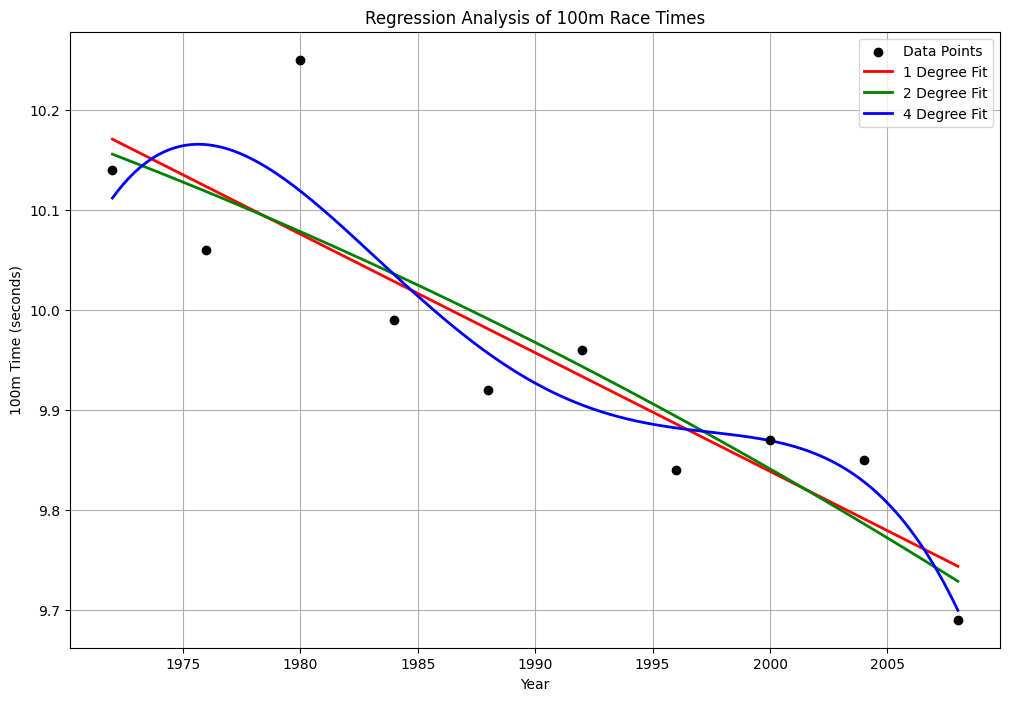

Leave-One-Out Cross-Validation Results:
1 Degree Polynomial Model RMSE: 0.1582
2 Degree Polynomial Model RMSE: 0.1676
4 Degree Polynomial Model RMSE: 0.3276

Detailed LOOCV Results using cross_val_score:
1 Degree Polynomial Model LOOCV RMSE: 0.1312
2 Degree Polynomial Model LOOCV RMSE: 0.1416
4 Degree Polynomial Model LOOCV RMSE: 0.2389


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Original Data
years = np.array([1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008])
times = np.array([10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69])

# Reshape data for sklearn
years = years.reshape(-1, 1)
times = times.reshape(-1, 1)

# Initialize Scalers
year_scaler = MinMaxScaler()
time_scaler = MinMaxScaler()

# Normalize Data
years_norm = year_scaler.fit_transform(years).flatten()
times_norm = time_scaler.fit_transform(times).flatten()

# Define Polynomial Degrees
degrees = [1, 2, 4]
models = {}
predictions = {}

# Fit Polynomial Models on Normalized Data
for degree in degrees:
    # Create a pipeline with Polynomial Features and Linear Regression
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
        ('linear_regression', LinearRegression())
    ])
    model.fit(years_norm.reshape(-1, 1), times_norm)
    models[degree] = model
    # Predict on normalized data
    y_pred_norm = model.predict(years_norm.reshape(-1, 1))
    # Recover original scale
    y_pred = time_scaler.inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
    predictions[degree] = y_pred

# Plotting the Original Data and Regression Lines
plt.figure(figsize=(12, 8))
plt.scatter(years, times, color='black', label='Data Points', zorder=5)

# Generate a smooth range of years for plotting regression lines
years_smooth = np.linspace(years.min(), years.max(), 300).reshape(-1, 1)
years_smooth_norm = year_scaler.transform(years_smooth)

for degree, color in zip(degrees, ['red', 'green', 'blue']):
    # Predict on smooth normalized data
    y_smooth_norm = models[degree].predict(years_smooth_norm)
    # Recover original scale
    y_smooth = time_scaler.inverse_transform(y_smooth_norm.reshape(-1, 1)).flatten()
    plt.plot(years_smooth, y_smooth, color=color, label=f'{degree} Degree Fit', linewidth=2)

plt.xlabel('Year')
plt.ylabel('100m Time (seconds)')
plt.title('Regression Analysis of 100m Race Times')
plt.legend()
plt.grid(True)
plt.show()

# Function to Perform LOOCV and Compute RMSE
def loocv_rmse(model, X, y):
    loo = LeaveOneOut()
    mse_scores = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    rmse = np.sqrt(np.mean(mse_scores))
    return rmse

# Perform LOOCV for Each Model
print("Leave-One-Out Cross-Validation Results:")
for degree in degrees:
    # Create a new pipeline for each degree
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
        ('linear_regression', LinearRegression())
    ])
    rmse = loocv_rmse(model, years_norm.reshape(-1, 1), times_norm)
    print(f"{degree} Degree Polynomial Model RMSE: {rmse:.4f}")

# Optional: Detailed LOOCV with sklearn's cross_val_score
# Define a scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

print("\nDetailed LOOCV Results using cross_val_score:")
for degree in degrees:
    # Create a pipeline for each degree
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
        ('linear_regression', LinearRegression())
    ])
    # Perform LOOCV
    scores = cross_val_score(model, years_norm.reshape(-1, 1), times_norm,
                             scoring=rmse_scorer, cv=LeaveOneOut())
    print(f"{degree} Degree Polynomial Model LOOCV RMSE: {scores.mean():.4f}")
